# Project DogBreedPrediction with CNN

In [1]:
!pip install -q kaggle

In [6]:
# !pip install google-colab --user

In [ ]:
conda install -c conda-forge google-colab

In [7]:
# from google.colab import files
# files.upload()

### Importing a Datasets from Kaggle

In [16]:
import os
path = "D:\\DataScience-60\\DogBreedPredictions"
dir_name = "dog_dataset"
path_dir = os.path.join(path, dir_name)
print(path_dir)
os.makedirs(path_dir, exist_ok=True)

D:\DataScience-60\DogBreedPredictions\dog_dataset


In [18]:
import os 
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

download_path = os.getcwd()

dataset_link = "https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp"

# Below line of code comment - due to not re run bymistaknly
# api.dataset_download_files("catherinehorng/dogbreedidfromcomp", path=path_dir, unzip=True) 


In [24]:
print(path_dir)
dataset_path = os.path.join(path_dir, "labels.csv")
os.listdir(path_dir)
print(dataset_path)

D:\DataScience-60\DogBreedPredictions\dog_dataset
D:\DataScience-60\DogBreedPredictions\dog_dataset\labels.csv


In [19]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           1593          6  0.1764706        


### Importing Library

In [73]:
# Important library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

from tqdm import tqdm
import keras.utils
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [72]:
dir(keras.utils)

['CustomObjectScope',
 'GeneratorEnqueuer',
 'OrderedEnqueuer',
 'Progbar',
 'Sequence',
 'SequenceEnqueuer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'array_to_img',
 'control_flow_util',
 'conv_utils',
 'custom_object_scope',
 'data_utils',
 'dataset_creator',
 'dataset_utils',
 'deserialize_keras_object',
 'generic_utils',
 'get_custom_objects',
 'get_file',
 'get_source_inputs',
 'image_dataset',
 'image_dataset_from_directory',
 'image_utils',
 'img_to_array',
 'io_utils',
 'keras_logging',
 'layer_utils',
 'load_img',
 'losses_utils',
 'metrics_utils',
 'mode_keys',
 'model_to_dot',
 'normalize',
 'np_utils',
 'object_identity',
 'pad_sequences',
 'plot_model',
 'save_img',
 'serialize_keras_object',
 'set_random_seed',
 'text_dataset',
 'text_dataset_from_directory',
 'tf_contextlib',
 'tf_inspect',
 'tf_utils',
 'timeseries_dataset',
 'timeseries_dataset_from_array',
 'to_categorical',
 'trac

In [27]:
label_all = pd.read_csv(dataset_path)
label_all.shape

(10222, 2)

In [28]:
label_all.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [37]:
label_all['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [43]:
CLASS_NAMES = ["scottish_deerhound","maltese_dog","bernese_mountain_dog"]

labels = label_all[(label_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [44]:
labels.shape

(357, 3)

In [49]:
X_data = np.zeros((len(labels), 224,224,3), dtype='float32')

y_data = label_binarize(labels['breed'], classes=CLASS_NAMES)

In [52]:
tqdm()

0it [00:00, ?it/s]

In [58]:
print(dataset_path)
print(path_dir)
os.listdir(path_dir)
train_dir = os.path.join(path_dir, 'train')
print(train_dir)

D:\DataScience-60\DogBreedPredictions\dog_dataset\labels.csv
D:\DataScience-60\DogBreedPredictions\dog_dataset
D:\DataScience-60\DogBreedPredictions\dog_dataset\train


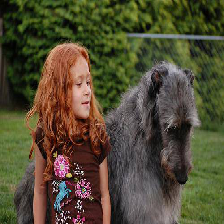

In [70]:
labels['id'][0]
sample_image = load_img(f"{train_dir}\\"'%s.jpg' % labels['id'][0], target_size=(224,224))
sample_image

In [77]:
np.expand_dims((224, ), axis=0)

array([[224]])

In [78]:
for i in tqdm(range(len(labels))):
    img = load_img(f"{train_dir}\\"'%s.jpg' % labels['id'][i], target_size=(224,224))
    img = img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x /255.0
    
print('Train images shape: ', X_data.shape, "size: {:,}".format(X_data.size))
print('label_binarize shape: ', y_data.shape, "size: {:,}".format(y_data.size))


 89%|███████████████████████████████████████████████████████████████████████▎        | 318/357 [00:08<00:00, 45.30it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 357/357 [00:08<00:00, 40.53it/s]

Train images shape:  (357, 224, 224, 3) size: 53,738,496
label_binarize shape:  (357, 3) size: 1,071


## Building a Model CNN

In [82]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(7, 7), activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(5, 5), activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dense(len(CLASS_NAMES), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 16)      

In [83]:
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X_data,y_data, test_size=0.1)

X_train,X_val,y_train,y_val = train_test_split(X_train_and_val, y_train_and_val, test_size=0.2)

In [84]:
epochs =5
batch_size = 32

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                   validation_data = (X_val, y_val))

Epoch 1/5
8/8 [==============================] - 206s 25s/step - loss: 4.8670 - accuracy: 0.3008 - val_loss: 4.8190 - val_accuracy: 0.2769
Epoch 2/5
8/8 [==============================] - 169s 18s/step - loss: 4.7737 - accuracy: 0.4297 - val_loss: 4.7277 - val_accuracy: 0.3538
Epoch 3/5
8/8 [==============================] - 179s 21s/step - loss: 4.6767 - accuracy: 0.5469 - val_loss: 4.6399 - val_accuracy: 0.3538
Epoch 4/5
8/8 [==============================] - 170s 22s/step - loss: 4.5820 - accuracy: 0.4219 - val_loss: 4.5603 - val_accuracy: 0.2923
Epoch 5/5
8/8 [==============================] - 125s 15s/step - loss: 4.4875 - accuracy: 0.5312 - val_loss: 4.4606 - val_accuracy: 0.4000


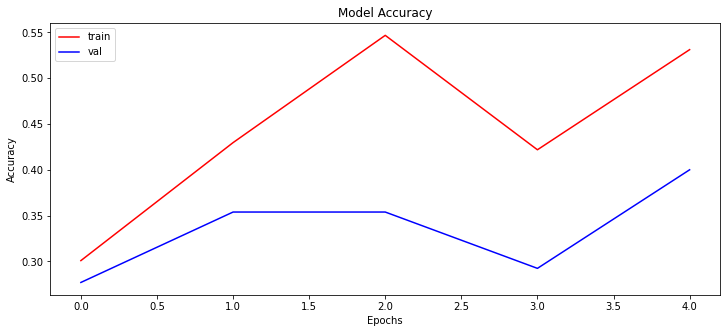

In [85]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','val'])
plt.show()

In [86]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print(score)

2/2 [==============================] - 3s 318ms/step - loss: 4.4514 - accuracy: 0.4444
[4.4513959884643555, 0.4444444477558136]


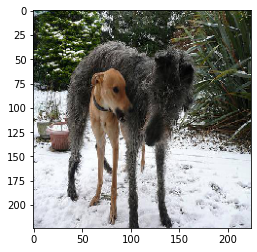

'scottish_deerhound'

In [90]:
plt.imshow(X_test[1,:,:,:])
plt.show()

labels['breed'][np.argmax(y_test[1])] # original
labels['breed'][np.argmax(y_pred[1])] # predicted

In [91]:
os.getcwd()

'D:\\DataScience-60\\DogBreedPredictions'

In [92]:
model.save('dog_breed.h5')